In [2]:
import scipy as scipy
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import seaborn as sns

# Important comments/resume
YOU SHOULD PUT IN THE FOLDER THE RIGHT DAVOS AND LAEGEREN FILES BECAUSE IT IS TOO HEAVY TO PUSH

We should maybe select a higher treshold for VPD because its relationship with GPP is not clear

Also wondering if we should use an other indicator than GPP (NPP, SIF...)

We however see that SM is more discriminant than VPD, but might be due to the things discussed above.

Chamau: 4-9

Laegeren : lae_daily['Month'].isin([4,5,6,7]))] better than 4-9

Davos : 

# Load data

In [75]:
cha_mat= h5py.File("CHAMAU.mat", 'r')
cha_mat

<HDF5 file "CHAMAU.mat" (mode r)>

In [ ]:
print(list(cha_mat.keys()))

['#refs#', 'ALB', 'ANPP_H', 'ANPP_L', 'AgeDL_H', 'AgeDL_L', 'AgeL_H', 'AgeL_L', 'AgePl_H', 'AgePl_L', 'AgrHarNut', 'Aice', 'An_H', 'An_L', 'Ared', 'Asur', 'Axyl_H', 'Axyl_L', 'BA_H', 'BA_L', 'BLit', 'B_H', 'B_L', 'Bfac_dayH', 'Bfac_dayL', 'Bfac_lo_H', 'Bfac_lo_L', 'Bfac_ls_H', 'Bfac_ls_L', 'Bfac_weekH', 'Bfac_weekL', 'Bio_Zs', 'CASE_ROOT', 'CK1', 'CK2', 'CO2', 'CT_H', 'CT_L', 'Ca', 'Cbare', 'Ccrown', 'CcrownFIX', 'Ccrown_t', 'Ci_shdH', 'Ci_shdL', 'Ci_sunH', 'Ci_sunL', 'Cice', 'Cicew', 'Ck', 'CkC_ALL', 'CkC_H', 'CkC_L', 'CkK_H', 'CkK_L', 'CkN_H', 'CkN_L', 'CkP_H', 'CkP_L', 'Cl_H', 'Cl_L', 'Color_Class', 'Computational_Time', 'Crock', 'Csno', 'Csnow', 'Curb', 'Cwat', 'Cx_H', 'Cx_L', 'DQ', 'DSE_H', 'DSE_L', 'DT', 'Datam', 'Date', 'Deb_Par', 'DeltaGMT', 'Directory', 'Do_H', 'Do_L', 'Dr_H', 'Dr_L', 'Ds', 'Dz', 'EG', 'EICE', 'EIn_H', 'EIn_L', 'EIn_rock', 'EIn_urb', 'EK', 'ELitter', 'ESN', 'ESN_In', 'ET', 'ETen', 'EWAT', 'EvL_Zs', 'ExEM', 'FI_H', 'FI_L', 'FNC_H', 'FNC_L', 'FROCK', 'G', 'Gfin'

In [15]:
cha = pd.DataFrame(
    { 
        #'NPP': cha_mat['NPP_L'][:].squeeze(), #Net primary production for low vegetation calculated each day with the T&C model
        'Ta': cha_mat['Ta'][:].squeeze(),
        'VPD': cha_mat['Ds'][:].squeeze(), #in Pa
        'SM': cha_mat['OF'][:].squeeze(), # first soil layer (surface)
        #'SIF':cha_mat['SIF_L'][:].squeeze() #CHA=grassland--> low vegetation # valeurs chaque jour donc on ajoute après
    }
)
cha

,Ta,VPD,SM
0,2.2570,6.134699,0.000000
1,2.2945,6.069162,0.430071
2,2.2490,13.289646,0.428790
3,2.3290,17.970873,0.428313
4,2.7175,15.666741,0.428256
...,...,...,...
87643,-9.0715,11.282861,0.214186
87644,-9.7030,13.785815,0.212035
87645,-10.7695,15.669038,0.210431
87646,-9.3050,13.607474,0.208364


In [16]:
start_date = '2005-01-01 00:00:00' #pour trouver la date de début: matlab/inputs/timestamp
#2004 à 2023
date_range = pd.date_range(start=start_date, periods=len(cha), freq='H')
cha['Date'] = date_range
cha['Date_day'] = cha['Date'].dt.date
cha['Year'] = cha['Date'].dt.year
cha['Month'] = cha['Date'].dt.month
cha['Day'] = cha['Date'].dt.day
cha['Hour'] = cha['Date'].dt.hour

#les data ne vont que jusqu'à 2016 dans CHAMAU alors qu'elles vont jusqu'à 2023 dans les données de base
cha

C:\Users\moeag\AppData\Local\Temp\ipykernel_20416\833172632.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, periods=len(cha), freq='H')


,Ta,VPD,SM,Date,Date_day,Year,Month,Day,Hour
0,2.2570,6.134699,0.000000,2005-01-01 00:00:00,2005-01-01,2005,1,1,0
1,2.2945,6.069162,0.430071,2005-01-01 01:00:00,2005-01-01,2005,1,1,1
2,2.2490,13.289646,0.428790,2005-01-01 02:00:00,2005-01-01,2005,1,1,2
3,2.3290,17.970873,0.428313,2005-01-01 03:00:00,2005-01-01,2005,1,1,3
4,2.7175,15.666741,0.428256,2005-01-01 04:00:00,2005-01-01,2005,1,1,4
...,...,...,...,...,...,...,...,...,...
87643,-9.0715,11.282861,0.214186,2014-12-31 19:00:00,2014-12-31,2014,12,31,19
87644,-9.7030,13.785815,0.212035,2014-12-31 20:00:00,2014-12-31,2014,12,31,20
87645,-10.7695,15.669038,0.210431,2014-12-31 21:00:00,2014-12-31,2014,12,31,21
87646,-9.3050,13.607474,0.208364,2014-12-31 22:00:00,2014-12-31,2014,12,31,22


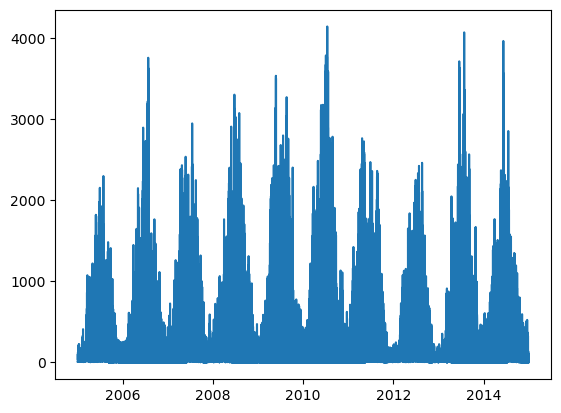

In [56]:
plt.plot(cha['Date'], cha['VPD'])

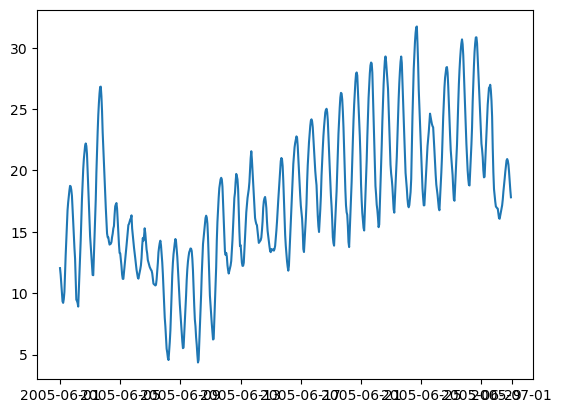

In [17]:
cha_2005 = cha[(cha['Year'] == 2005) & (cha['Month'] == 6)]

# Graphe GPP vs Date pour juin 2005
plt.figure()
plt.plot(cha_2005['Date'], cha_2005['Ta'])

# Daily mean

In [18]:
# Groupby day to have daily mean
cha_daily = cha.groupby('Date_day')[['Ta','VPD','SM']].mean().reset_index()

#rearrange
cha_daily.rename(columns={'Date_day': 'Date'}, inplace=True)
cha_daily['Date'] = pd.to_datetime(cha_daily['Date'])
cha_daily['Year'] = cha_daily['Date'].dt.year
cha_daily['Month'] = cha_daily['Date'].dt.month
cha_daily['Day'] = cha_daily['Date'].dt.day

cha_daily

,Date,Ta,VPD,SM,Year,Month,Day
0,2005-01-01,3.506875,34.552570,0.405759,2005,1,1
1,2005-01-02,4.580042,64.360370,0.427769,2005,1,2
2,2005-01-03,1.560708,65.971632,0.427691,2005,1,3
3,2005-01-04,1.037062,58.476064,0.412771,2005,1,4
4,2005-01-05,2.516396,69.353332,0.395775,2005,1,5
...,...,...,...,...,...,...,...
3647,2014-12-27,0.382771,45.870856,0.249852,2014,12,27
3648,2014-12-28,-0.905813,55.236311,0.256427,2014,12,28
3649,2014-12-29,-7.178979,30.106732,0.144904,2014,12,29
3650,2014-12-30,-2.971437,7.094880,0.177588,2014,12,30


In [79]:
cha_mat['Slf_L'][:].shape

(1, 3653)

In [80]:
# Chamau is grassland so we will use net primary production low vegetation
# 'Ta': cha_mat['Ta'][:].squeeze(),
cha_mat['NPP_L'][0][1:]
cha_daily['NPP'] = cha_mat['NPP_L'][0][1:].squeeze()
cha_daily['SIF'] = cha_mat['Slf_L'][0][1:].squeeze()

#Problème: NPP a une longueur de 3652 alors que daily mean en a un de 3653. La première valeur est de 0 donc on l'enlève

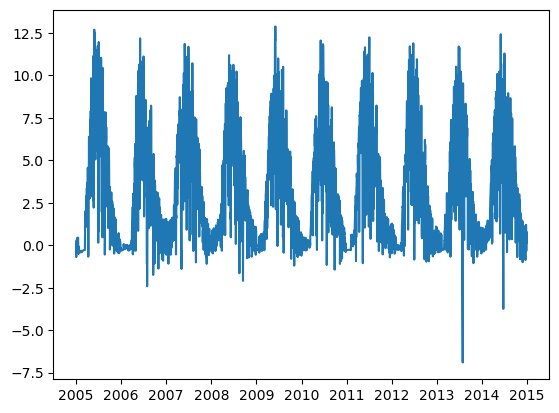

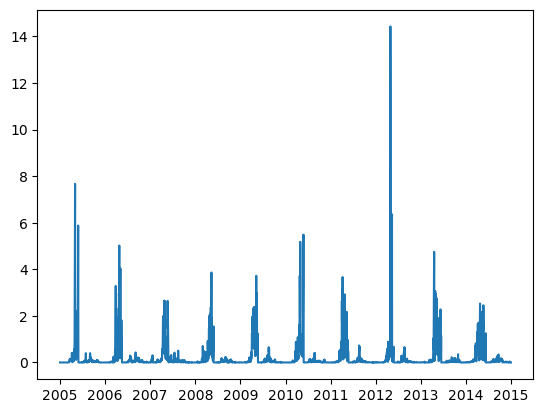

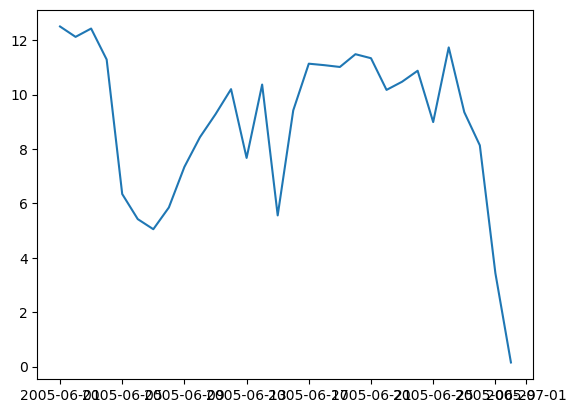

In [81]:
plt.plot(cha_daily['Date'], cha_daily['NPP'])
plt.figure()
plt.plot(cha_daily['Date'], cha_daily['SIF'])
plt.figure()
cha_daily_month=cha_daily[(cha_daily['Year'] == 2005) & (cha_daily['Month'] == 6)]
cha_daily_month
plt.plot(cha_daily_month['Date'], cha_daily_month['NPP'])

# Filter data

In [82]:
#Filter the daily data
cha_filtered=cha_daily[(cha_daily['VPD']>500) & (cha_daily['Ta']>15) & (cha_daily['Month'].isin([4, 5, 6, 7, 8, 9]))]
cha_filtered

,Date,Ta,VPD,SM,Year,Month,Day,NPP,SIF
144,2005-05-25,16.486125,541.790846,0.387202,2005,5,25,10.096085,0.660965
145,2005-05-26,19.077437,654.859749,0.369477,2005,5,26,10.220479,2.707251
146,2005-05-27,21.047333,690.378347,0.359195,2005,5,27,9.122543,5.033160
147,2005-05-28,21.948625,772.772026,0.348879,2005,5,28,8.021781,5.880713
148,2005-05-29,21.980708,723.018001,0.347644,2005,5,29,12.690010,2.893773
...,...,...,...,...,...,...,...,...,...
3498,2014-07-31,19.829896,641.036763,0.397040,2014,7,31,0.745808,0.015846
3499,2014-08-01,18.754167,540.735582,0.374618,2014,8,1,8.958157,0.044664
3506,2014-08-08,20.871021,506.666300,0.357113,2014,8,8,4.377038,0.054204
3507,2014-08-09,20.869417,542.470531,0.350901,2014,8,9,4.845592,0.122239


There are 556 observations/days between 2005 and 2014 respecting our three conditions.

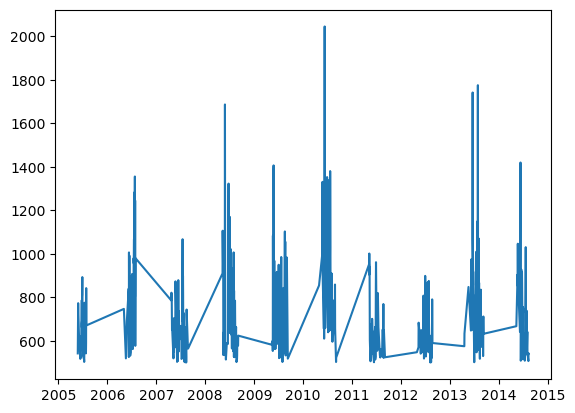

In [53]:
plt.plot(cha_filtered['Date'], cha_filtered['VPD'])

# Divide VPD and SM in bins

{'whiskers': [<matplotlib.lines.Line2D at 0x2529463d880>,
 'caps': [<matplotlib.lines.Line2D at 0x2529463de80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2529463d670>],
 'medians': [<matplotlib.lines.Line2D at 0x2529463e3f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2529463e630>],
 'means': []}

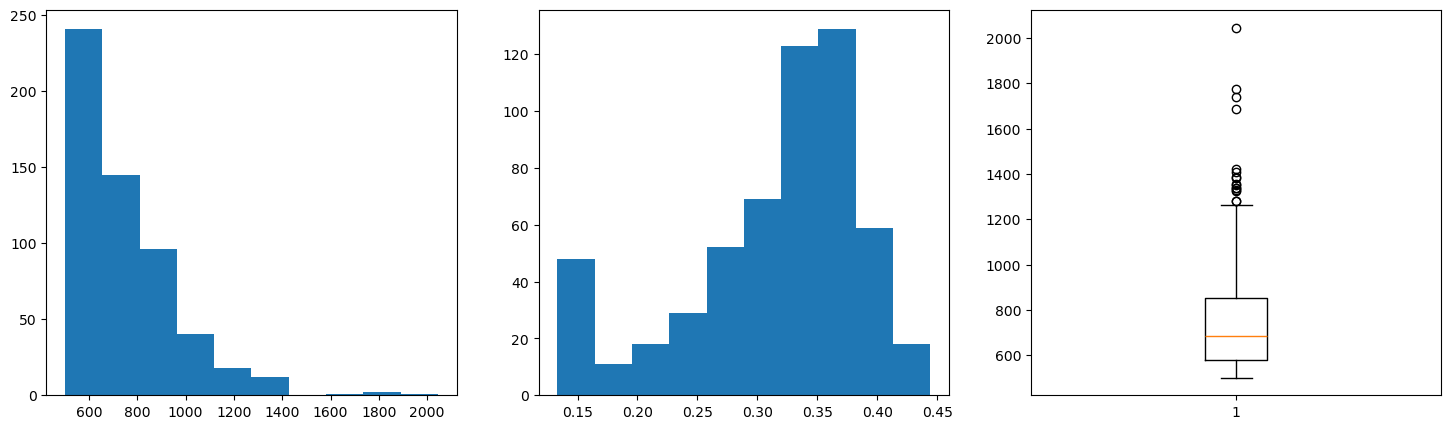

In [83]:
# Histogrammes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(cha_filtered['VPD'])
plt.subplot(1, 3, 2)
plt.hist(cha_filtered['SM'])
plt.subplot(1, 3, 3)
plt.boxplot(cha_filtered['VPD'])

In [84]:
#Divide in bins
cha_filtered = cha_filtered.copy() #to have an explicit copy (if not it raises an error)
cha_filtered['SM_bin'] = pd.qcut(cha_filtered['SM'], q=10, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
cha_filtered['VPD_bin'] = pd.qcut(cha_filtered['VPD'], q=10, labels=False) + 1
cha_filtered

,Date,Ta,VPD,SM,Year,Month,Day,NPP,SIF,SM_bin,VPD_bin
144,2005-05-25,16.486125,541.790846,0.387202,2005,5,25,10.096085,0.660965,9,2
145,2005-05-26,19.077437,654.859749,0.369477,2005,5,26,10.220479,2.707251,8,5
146,2005-05-27,21.047333,690.378347,0.359195,2005,5,27,9.122543,5.033160,7,6
147,2005-05-28,21.948625,772.772026,0.348879,2005,5,28,8.021781,5.880713,7,7
148,2005-05-29,21.980708,723.018001,0.347644,2005,5,29,12.690010,2.893773,6,6
...,...,...,...,...,...,...,...,...,...,...,...
3498,2014-07-31,19.829896,641.036763,0.397040,2014,7,31,0.745808,0.015846,10,4
3499,2014-08-01,18.754167,540.735582,0.374618,2014,8,1,8.958157,0.044664,9,2
3506,2014-08-08,20.871021,506.666300,0.357113,2014,8,8,4.377038,0.054204,7,1
3507,2014-08-09,20.869417,542.470531,0.350901,2014,8,9,4.845592,0.122239,7,2


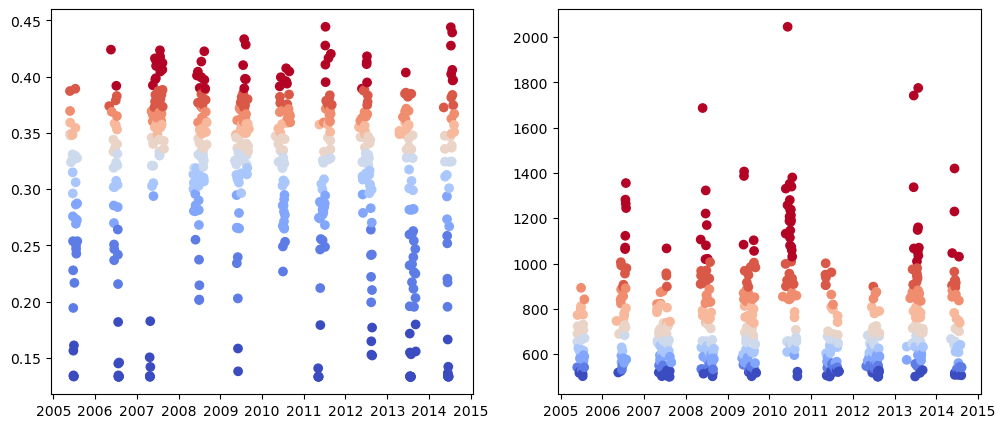

In [89]:
# verification
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(
    cha_filtered['Date'],         
    cha_filtered['SM'],c=cha_filtered['SM_bin'], cmap='coolwarm')
plt.subplot(1,2,2)

plt.scatter(
    cha_filtered['Date'],         
    cha_filtered['VPD'],c=cha_filtered['VPD_bin'], cmap='coolwarm')

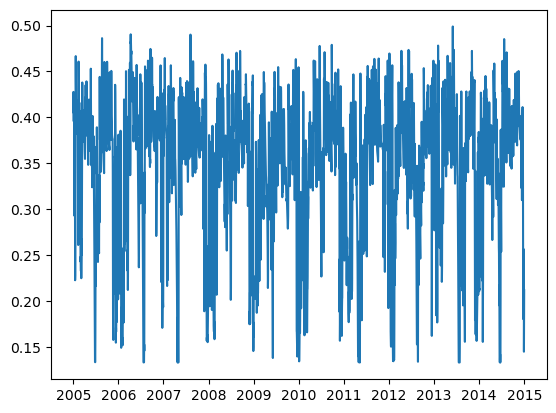

In [97]:
plt.plot(cha_daily['Date'], cha_daily['SM'])

 # Relationships between GPP and VPD

Text(0, 0.5, 'NPP')

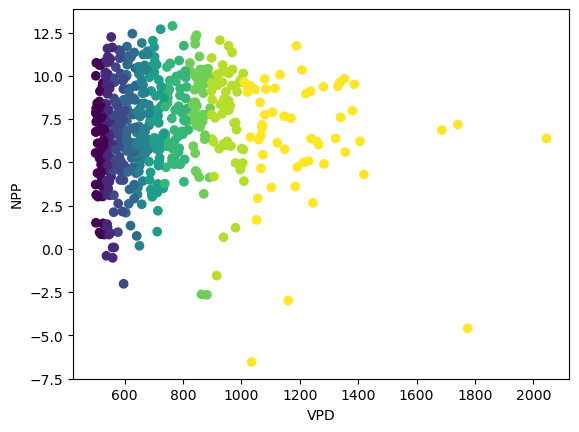

In [90]:
plt.scatter(cha_filtered['VPD'], cha_filtered['NPP'], c=cha_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('VPD')
plt.ylabel('NPP')

The relationship is not clear, we should maybe use a higher threshold.

    SM_bin  VPD_bin       NPP       SIF
0        1        2  9.423245  0.002864
1        1        3  2.832097  0.203655
2        1        4  4.789662  0.111228
3        1        5  8.352641  0.791535
4        1        6  4.186743  0.183304
..     ...      ...       ...       ...
90      10        4  4.074624  0.042947
91      10        5  5.681053  0.106681
92      10        6  6.654649  0.077218
93      10        7  8.376934  0.051696
94      10        9  9.560513  0.023654

[95 rows x 4 columns]


C:\Users\moeag\AppData\Local\Temp\ipykernel_20416\533619050.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


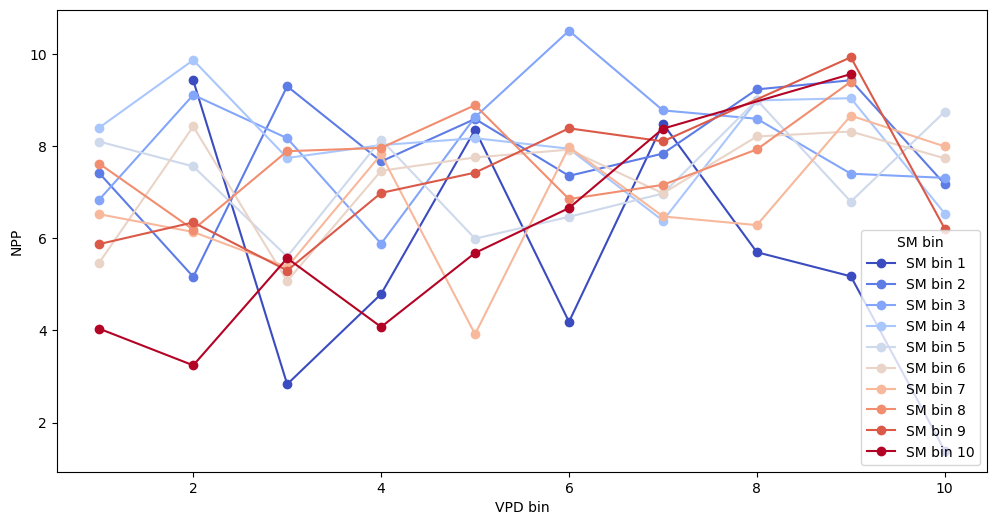

In [95]:
# for each combination of bins
grouped = cha_filtered.groupby(['SM_bin', 'VPD_bin'])[['NPP', 'SIF']].mean().reset_index()
print(grouped)

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 10)

for i, sm_bin in enumerate(sorted(grouped['SM_bin'].unique())):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin')
plt.ylabel('NPP')
plt.show()   

It is strange that GPP seems to increase with VPD

 # Relationships between GPP and soil moisture

Text(0, 0.5, 'NPP')

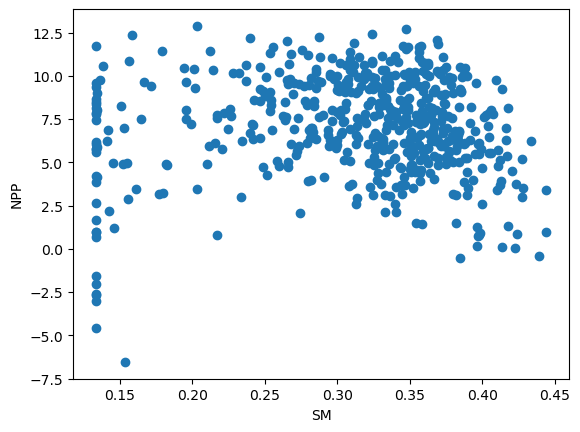

In [59]:
plt.scatter(cha_filtered['SM'], cha_filtered['NPP'])
plt.xlabel('SM')
plt.ylabel('NPP')

C:\Users\moeag\AppData\Local\Temp\ipykernel_20416\1069676178.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


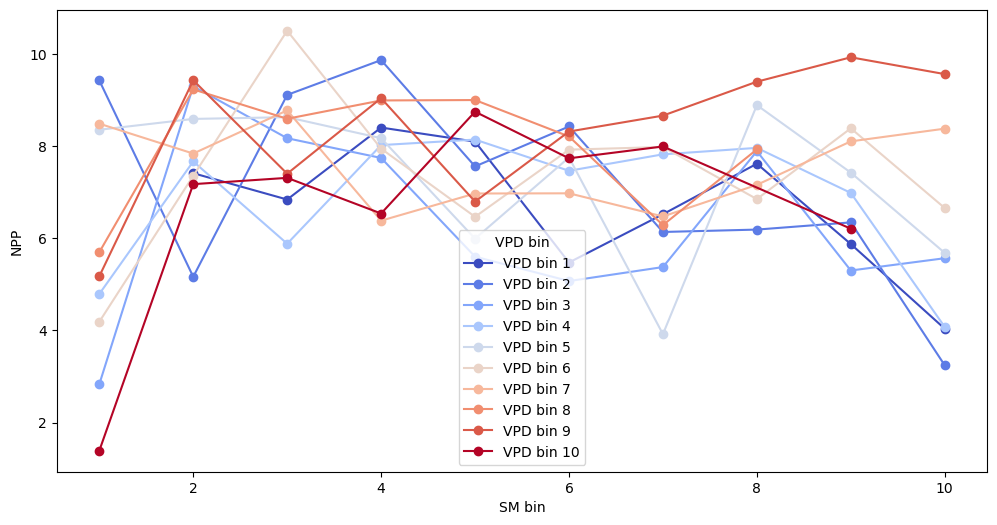

In [91]:
plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 10)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin')
plt.ylabel('NPP')
plt.show() 

Here, soil moisture more discriminant than VPD. 

# relationship between sif and sm

Text(0, 0.5, 'SIF')

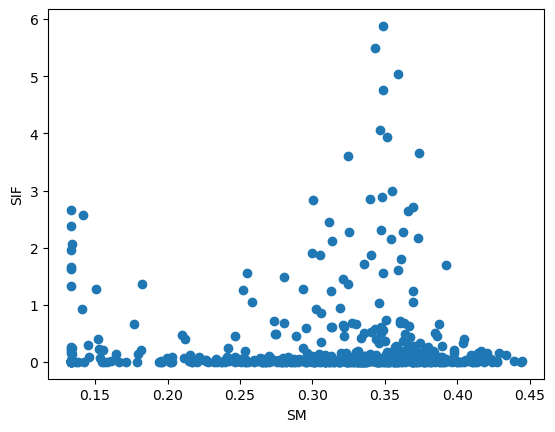

In [85]:
plt.scatter(cha_filtered['SM'], cha_filtered['SIF'])
plt.xlabel('SM')
plt.ylabel('SIF')

C:\Users\moeag\AppData\Local\Temp\ipykernel_20416\2246290060.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


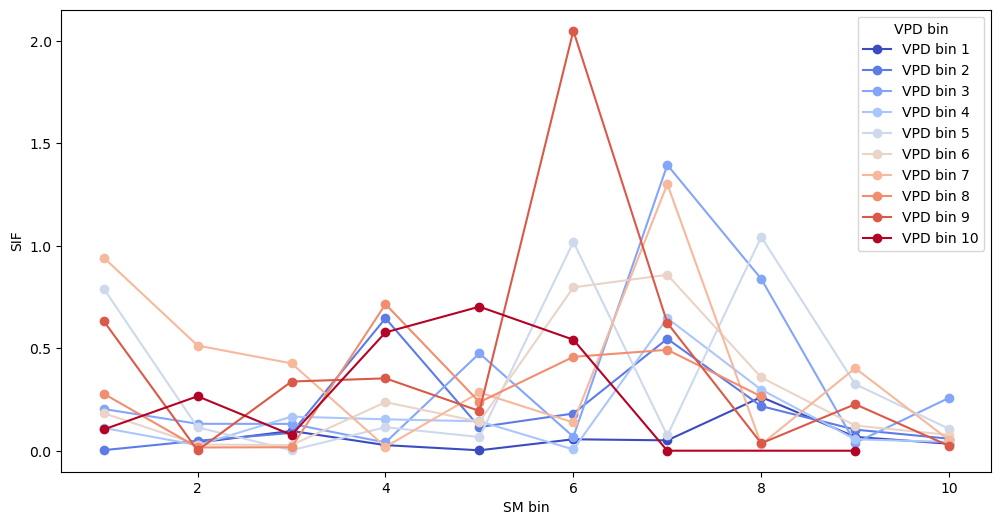

In [96]:
plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 10)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['SIF'] ,
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin')
plt.ylabel('SIF')
plt.show() 

# Heatmap

<Axes: xlabel='SM_bin', ylabel='VPD_bin'>

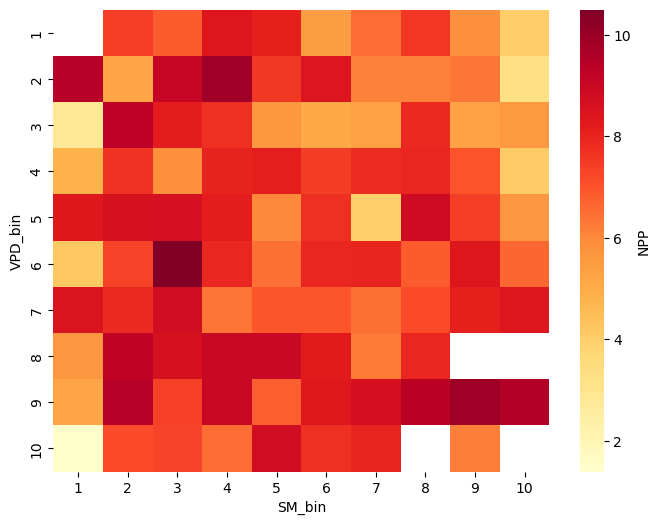

In [63]:
pivot_table = grouped.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'NPP'}
)

It is strange that GPP seems to increase with VPD. However, we also see that SM is discriminant here.

# VPD limitation on GPP without coupling and same for SM (figure 3f, Liu et al.) TO IMPROVE

We used the approach 1 : we calculate the difference between SIF at the highest VPD bin and lowest VPD bin in each SM bin to derive the .SIF(VPD|SM) cf paper for the complete calcul

We could have used the 2nd approach, but we estimated that there were not enough points to do a linear regression, and it is the 1st approach that is shown in their paper.

However, considering the irregular relationship between GPP and VPD, we could have used approach 2 to smooth a bit, or a non linear approach

In [ ]:
# for each bin of SM, difference of GPP between max bin vpd and min bin vpd
delta_gpp_vpd = []
for sm_bin in sorted(grouped['SM_bin'].unique()):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    
    if not subset.empty:
        min_vpd_bin = subset['VPD_bin'].min()
        max_vpd_bin = subset['VPD_bin'].max()

        gpp_min = subset[subset['VPD_bin'] == min_vpd_bin]['GPP'].values
        gpp_max = subset[subset['VPD_bin'] == max_vpd_bin]['GPP'].values

        if len(gpp_min) > 0 and len(gpp_max) > 0:
            delta = gpp_max[0] - gpp_min[0]
            delta_gpp_vpd.append({'SM_bin': sm_bin, 'delta_gpp_vpd': delta})

delta_gpp_vpd_df = pd.DataFrame(delta_gpp_vpd)

delta_gpp_vpd_df

,SM_bin,delta_gpp_vpd
0,1,2.614363
1,2,4.164804
2,3,4.623237
3,4,5.264993
4,5,8.709358
5,6,11.222955
6,7,10.189722
7,8,15.141427
8,9,11.781687
9,10,11.974750


In [ ]:
delta_gpp_sm = []

for vpd_bin in sorted(grouped['VPD_bin'].unique()):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    
    if not subset.empty:
        min_sm_bin = subset['SM_bin'].min()
        max_sm_bin = subset['SM_bin'].max()

        gpp_min = subset[subset['SM_bin'] == min_sm_bin]['GPP'].values
        gpp_max = subset[subset['SM_bin'] == max_sm_bin]['GPP'].values

        if len(gpp_min) > 0 and len(gpp_max) > 0:
            delta = gpp_max[0] - gpp_min[0]
            delta_gpp_sm.append({'VPD_bin': vpd_bin, 'delta_gpp_sm': delta})

delta_gpp_sm_df = pd.DataFrame(delta_gpp_sm)

delta_gpp_sm_df

,VPD_bin,delta_gpp_sm
0,1,6.375977
1,2,5.685878
2,3,10.924427
3,4,6.481404
4,5,4.376720
5,6,8.850573
6,7,7.394696
7,8,9.293918
8,9,15.009371
9,10,14.552323


(1.6143634278038066, 16.14142710848528)

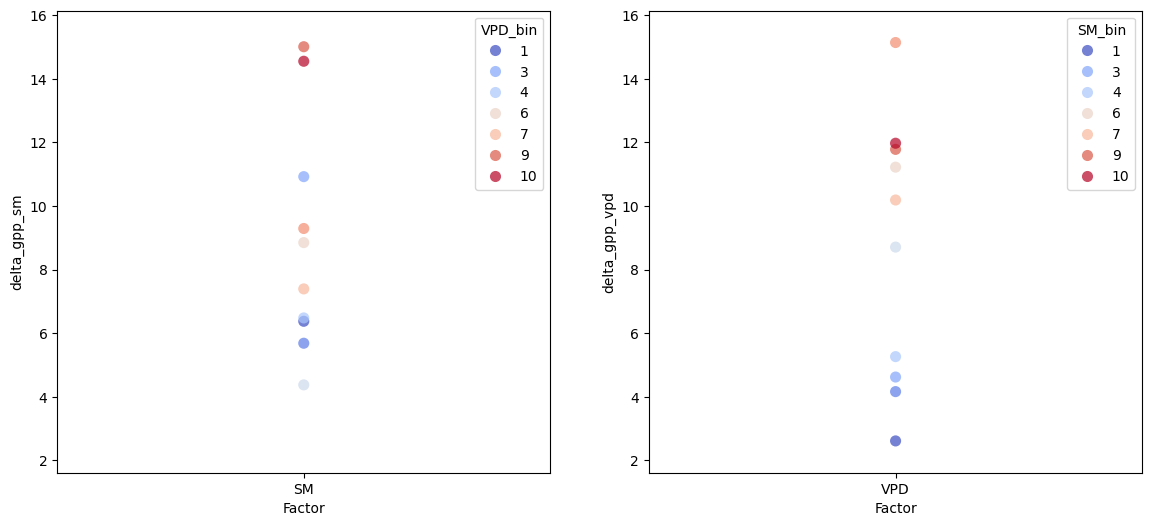

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique pour delta_gpp_sm en fonction des bins VPD
delta_gpp_sm_df['Factor'] = 'SM'
sns.stripplot(x='Factor', y='delta_gpp_sm', data=delta_gpp_sm_df, hue='VPD_bin', 
              palette='coolwarm', jitter=False,  size=8, alpha=0.7, ax=axes[0])

# Graphique pour delta_gpp_vpd en fonction des bins SM
delta_gpp_vpd_df['Factor'] = 'VPD'
sns.stripplot(x='Factor', y='delta_gpp_vpd', data=delta_gpp_vpd_df, hue='SM_bin', 
              palette='coolwarm', jitter=False, size=8, alpha=0.7, ax=axes[1])

#  même échelle
y_min = min(delta_gpp_sm_df['delta_gpp_sm'].min(), delta_gpp_vpd_df['delta_gpp_vpd'].min())
y_max = max(delta_gpp_sm_df['delta_gpp_sm'].max(), delta_gpp_vpd_df['delta_gpp_vpd'].max())

axes[0].set_ylim(y_min-1, y_max+1)  # Échelle des ordonnées pour le premier graphique
axes[1].set_ylim(y_min-1, y_max+1)  # Échelle des ordonnées pour le deuxième graphique


# Application to Laegeren

            Ta        VPD        SM                Date    Date_day  Year  \
0      -1.1580  45.228303  0.000000 2004-01-01 00:00:00  2004-01-01  2004   
1      -1.1985  36.439442  0.264366 2004-01-01 01:00:00  2004-01-01  2004   
2      -1.2895  33.900754  0.237038 2004-01-01 02:00:00  2004-01-01  2004   
3      -1.2185  38.006055  0.227822 2004-01-01 03:00:00  2004-01-01  2004   
4      -1.3365  31.382655  0.218617 2004-01-01 04:00:00  2004-01-01  2004   
...        ...        ...       ...                 ...         ...   ...   
149035 -0.0970   0.012134  0.349410 2020-12-31 19:00:00  2020-12-31  2020   
149036  0.1760   0.012377  0.350479 2020-12-31 20:00:00  2020-12-31  2020   
149037  0.3345   0.012521  0.351817 2020-12-31 21:00:00  2020-12-31  2020   
149038  0.4765   0.012650  0.351609 2020-12-31 22:00:00  2020-12-31  2020   
149039  0.6000   0.012764  0.354873 2020-12-31 23:00:00  2020-12-31  2020   

        Month  Day  Hour  
0           1    1     0  
1           1    1   

C:\Users\moeag\AppData\Local\Temp\ipykernel_92728\1694654786.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, periods=len(lae), freq='H')


Text(0, 0.5, 'NPP')

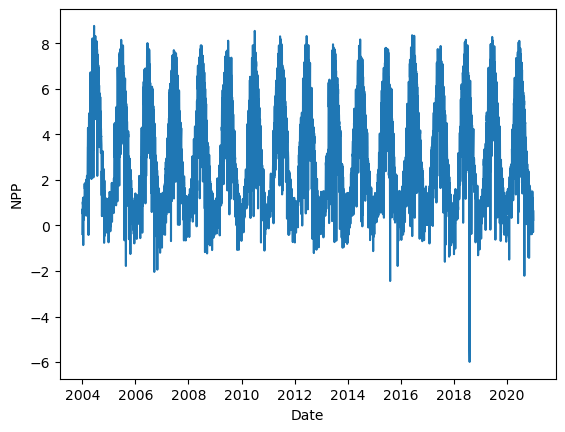

In [15]:
## Load data
lae_mat= h5py.File("LAEGEREN.mat", 'r')
lae_mat

lae = pd.DataFrame(
    { 
        'Ta': lae_mat['Ta'][:].squeeze(),
        'VPD': lae_mat['Ds'][:].squeeze(), #in Pa
        'SM': lae_mat['OF'][:].squeeze(), # first soil layer (surface)
    }
)

start_date = '2004-01-01 00:00:00' # de 2004 à 2023
date_range = pd.date_range(start=start_date, periods=len(lae), freq='H')
lae['Date'] = date_range
lae['Date_day'] = lae['Date'].dt.date
lae['Year'] = lae['Date'].dt.year
lae['Month'] = lae['Date'].dt.month
lae['Day'] = lae['Date'].dt.day
lae['Hour'] = lae['Date'].dt.hour

#les data ne vont que jusqu'à 2016 dans laeMAU alors qu'elles vont jusqu'à 2023 dans les données de base
print(lae)


## Daily mean
# Groupby day to have daily mean
lae_daily = lae.groupby('Date_day')[['Ta','VPD','SM']].mean().reset_index()

#rearrange
lae_daily.rename(columns={'Date_day': 'Date'}, inplace=True)
lae_daily['Date'] = pd.to_datetime(lae_daily['Date'])
lae_daily['Year'] = lae_daily['Date'].dt.year
lae_daily['Month'] = lae_daily['Date'].dt.month
lae_daily['Day'] = lae_daily['Date'].dt.day

lae_daily['NPP'] = lae_mat['NPP_H'][1][1:] #high because mixed deciduous mountain forest #there were 2 columns, I took the one with positive values

plt.plot(lae_daily['Date'], lae_daily['NPP'])
plt.xlabel('Date')
plt.ylabel('NPP')

In [12]:
#lae_mat['NPP_H'][1][1:] #there were 2 columns, I took the one with positive values
#lae_mat[Slf_H][0][1:]
# cha_daily['NPP'] = cha_mat['NPP_L'][0][1:].squeeze()
# cha_daily['SIF'] = cha_mat['Slf_L'][0][1:].squeeze()

           Date         Ta          VPD        SM  Year  Month  Day       NPP
138  2004-05-18  16.444771   592.185033  0.377989  2004      5   18  6.711342
139  2004-05-19  16.604938   579.386340  0.371987  2004      5   19  7.420610
140  2004-05-20  17.545771   619.176780  0.365783  2004      5   20  8.216178
158  2004-06-07  15.582583   529.238245  0.424385  2004      6    7  7.146335
159  2004-06-08  19.535813   651.842475  0.409703  2004      6    8  7.614801
...         ...        ...          ...       ...   ...    ...  ...       ...
6052 2020-07-27  23.300729  1352.811714  0.251585  2020      7   27  7.149595
6053 2020-07-28  23.157792  1039.200835  0.281643  2020      7   28  6.336081
6054 2020-07-29  21.869042  1238.444475  0.293760  2020      7   29  6.234477
6055 2020-07-30  24.591688  1809.287731  0.269014  2020      7   30  6.831616
6056 2020-07-31  27.648125  2060.384299  0.249449  2020      7   31  5.965532

[752 rows x 8 columns]
           Date         Ta          VPD 

C:\Users\moeag\AppData\Local\Temp\ipykernel_92728\2721130751.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


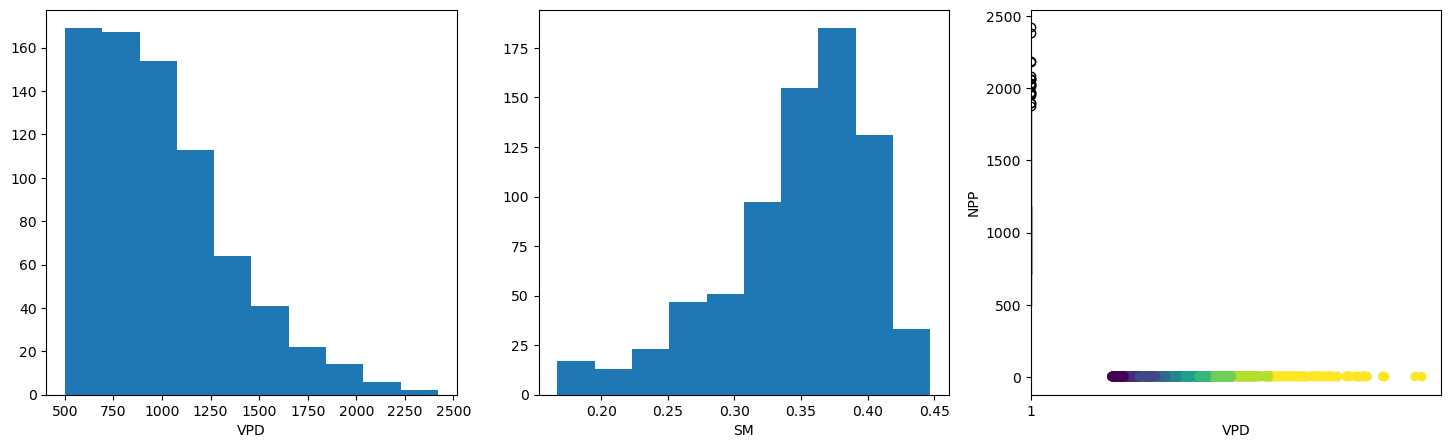

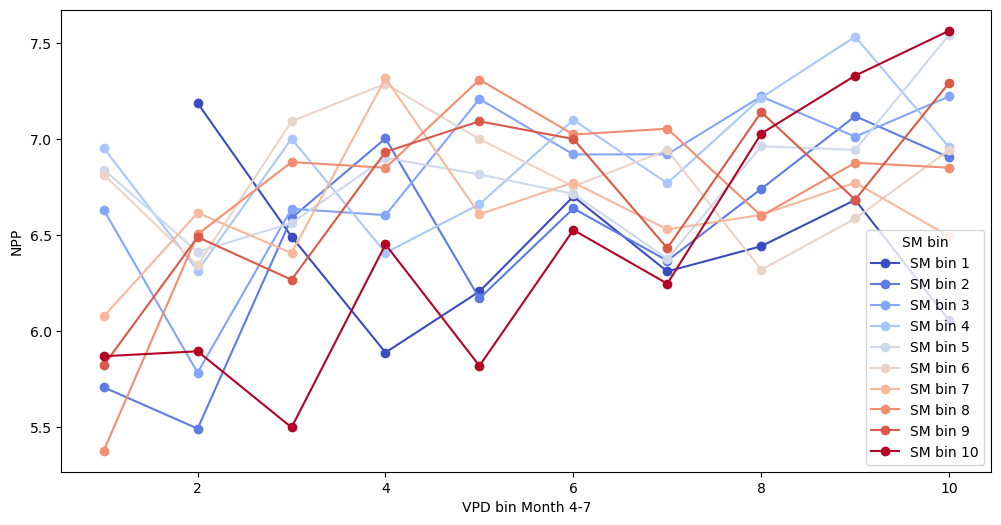

C:\Users\moeag\AppData\Local\Temp\ipykernel_92728\2721130751.py:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


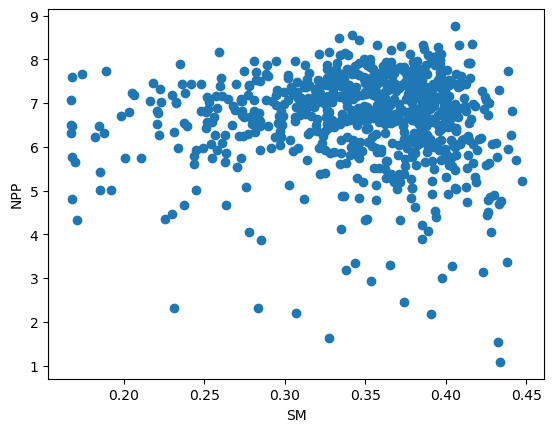

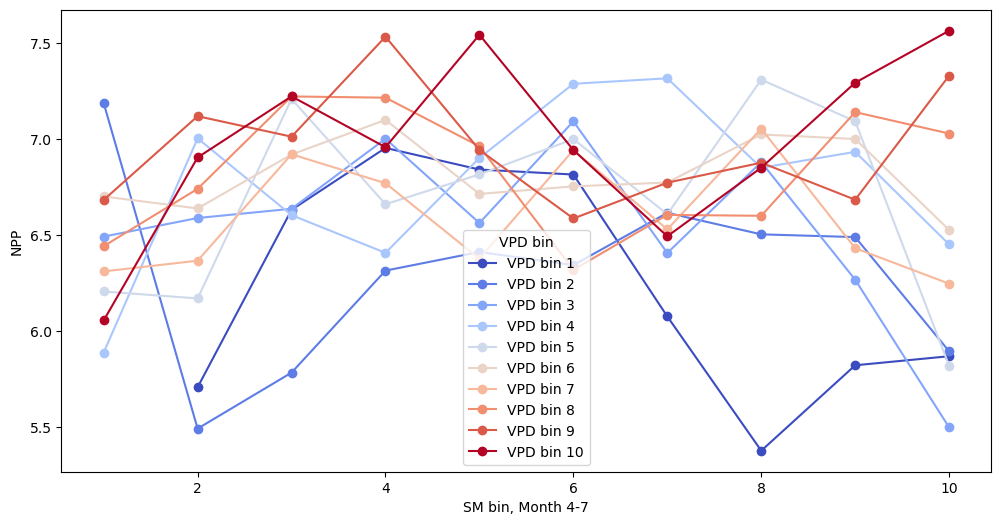

<Axes: xlabel='SM_bin', ylabel='VPD_bin'>

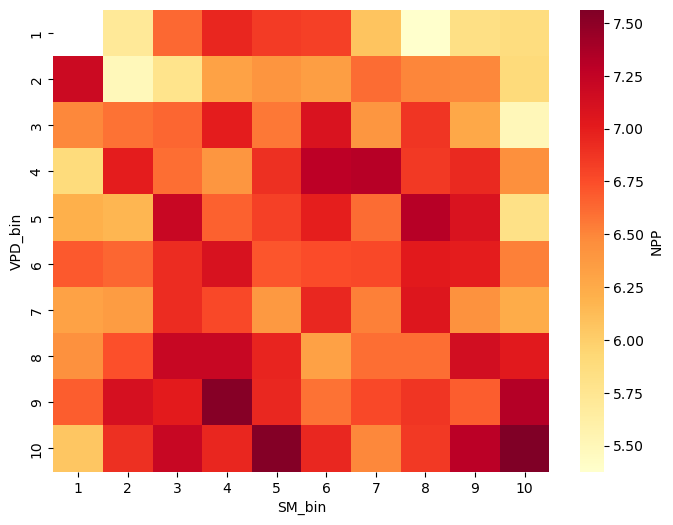

In [25]:
## Filter data
lae_filtered=lae_daily[(lae_daily['VPD']>500) & (lae_daily['Ta']>15) & (lae_daily['Month'].isin([4,5,6,7]))]
#if months are 4-7: more linear relationship
print(lae_filtered)


## Divide in bins
# Histogrammes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(lae_filtered['VPD'])
plt.xlabel('VPD')
plt.subplot(1, 3, 2)
plt.hist(lae_filtered['SM'])
plt.xlabel('SM')
plt.subplot(1, 3, 3)
plt.boxplot(lae_filtered['VPD'])
plt.xlabel('VPD')

#Divide in bins
lae_filtered = lae_filtered.copy() #to have an explicit copy (if not it raises an error)
lae_filtered['SM_bin'] = pd.qcut(lae_filtered['SM'], q=10, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
lae_filtered['VPD_bin'] = pd.qcut(lae_filtered['VPD'], q=10, labels=False) + 1
print(lae_filtered)

## Relationships between NPP and VPD
plt.scatter(lae_filtered['VPD'], lae_filtered['NPP'], c=lae_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('VPD')
plt.ylabel('NPP')

# for each combination of bins
grouped = lae_filtered.groupby(['SM_bin', 'VPD_bin'])['NPP'].mean().reset_index()

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 10)

for i, sm_bin in enumerate(sorted(grouped['SM_bin'].unique())):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin Month 4-7')
plt.ylabel('NPP')
plt.show()

## Relationship between NPP and soil moisture
plt.scatter(lae_filtered['SM'], lae_filtered['NPP'])
plt.xlabel('SM')
plt.ylabel('NPP')

plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 10)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin, Month 4-7')
plt.ylabel('NPP')
plt.show() 

## Heatmap
pivot_table = grouped.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'NPP'}
)


In [12]:
print(lae)

        GPP      Ta        VPD   SM                Date    Date_day  Year  \
0       0.0 -1.1580  45.228303  0.0 2004-01-01 00:00:00  2004-01-01  2004   
1       0.0 -1.1985  36.439442  0.0 2004-01-01 01:00:00  2004-01-01  2004   
2       0.0 -1.2895  33.900754  0.0 2004-01-01 02:00:00  2004-01-01  2004   
3       0.0 -1.2185  38.006055  0.0 2004-01-01 03:00:00  2004-01-01  2004   
4       0.0 -1.3365  31.382655  0.0 2004-01-01 04:00:00  2004-01-01  2004   
...     ...     ...        ...  ...                 ...         ...   ...   
175315  0.0  1.2230   0.013351  0.0 2023-12-31 19:00:00  2023-12-31  2023   
175316  0.0  0.8505   0.012997  0.0 2023-12-31 20:00:00  2023-12-31  2023   
175317  0.0  0.9725   0.013112  0.0 2023-12-31 21:00:00  2023-12-31  2023   
175318  0.0  1.3240   0.013449  0.0 2023-12-31 22:00:00  2023-12-31  2023   
175319  0.0  1.3865   0.013510  0.0 2023-12-31 23:00:00  2023-12-31  2023   

        Month  Day  Hour  
0           1    1     0  
1           1    1   

# Application to Davos

In [3]:
## Load data (1997- 2020)
dav_mat= h5py.File("DAVOS.mat", 'r')
dav_mat

dav = pd.DataFrame(
    { 
        'Ta': dav_mat['Ta'][:].squeeze(),
        'VPD': dav_mat['Ds'][:].squeeze(), #in Pa
        'SM': dav_mat['OF'][:].squeeze(), # first soil layer (surface)
    }
)

start_date = '2004-01-01 00:00:00' # de 2004 à 2023
date_range = pd.date_range(start=start_date, periods=len(dav), freq='H')
dav['Date'] = date_range
dav['Date_day'] = dav['Date'].dt.date
dav['Year'] = dav['Date'].dt.year
dav['Month'] = dav['Date'].dt.month
dav['Day'] = dav['Date'].dt.day
dav['Hour'] = dav['Date'].dt.hour

#les data ne vont que jusqu'à 2016 dans davMAU alors qu'elles vont jusqu'à 2023 dans les données de base
print(dav)


## Daily mean
# Groupby day to have daily mean
dav_daily = dav.groupby('Date_day')[['Ta','VPD','SM']].mean().reset_index()

#rearrange
dav_daily.rename(columns={'Date_day': 'Date'}, inplace=True)
dav_daily['Date'] = pd.to_datetime(dav_daily['Date'])
dav_daily['Year'] = dav_daily['Date'].dt.year
dav_daily['Month'] = dav_daily['Date'].dt.month
dav_daily['Day'] = dav_daily['Date'].dt.day

dav_daily['NPP'] = dav_mat['NPP_H'][1][1:] #high because mixed deciduous mountain forest #there were 2 columns, I took the one with positive values

plt.plot(dav_daily['Date'], dav_daily['NPP'])
plt.xlabel('Date')
plt.ylabel('NPP')

KeyError: "Unable to open object (object 'OF' doesn't exist)"

In [ ]:
## Filter data
dav_filtered=dav_daily[(dav_daily['VPD']>500) & (dav_daily['Ta']>15) & (dav_daily['Month'].isin([4,5,6,7]))]
#if months are 4-7: more linear relationship
print(dav_filtered)


## Divide in bins
# Histogrammes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(dav_filtered['VPD'])
plt.xlabel('VPD')
plt.subplot(1, 3, 2)
plt.hist(dav_filtered['SM'])
plt.xlabel('SM')
plt.subplot(1, 3, 3)
plt.boxplot(dav_filtered['VPD'])
plt.xlabel('VPD')

#Divide in bins
dav_filtered = dav_filtered.copy() #to have an explicit copy (if not it raises an error)
dav_filtered['SM_bin'] = pd.qcut(dav_filtered['SM'], q=10, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
dav_filtered['VPD_bin'] = pd.qcut(dav_filtered['VPD'], q=10, labels=False) + 1
print(dav_filtered)

## Relationships between NPP and VPD
plt.scatter(dav_filtered['VPD'], dav_filtered['NPP'], c=dav_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('VPD')
plt.ylabel('NPP')

# for each combination of bins
grouped = dav_filtered.groupby(['SM_bin', 'VPD_bin'])['NPP'].mean().reset_index()

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 10)

for i, sm_bin in enumerate(sorted(grouped['SM_bin'].unique())):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin Month 4-7')
plt.ylabel('NPP')
plt.show()

## Relationship between NPP and soil moisture
plt.scatter(dav_filtered['SM'], dav_filtered['NPP'])
plt.xlabel('SM')
plt.ylabel('NPP')

plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 10)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin, Month 4-7')
plt.ylabel('NPP')
plt.show() 

## Heatmap
pivot_table = grouped.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'NPP'}
)

# Merging the 3 stations

In [ ]:
merged = pd.concat([cha_daily, dav_daily, lae_daily], ignore_index=True)

#filter
merged_filtered = merged[(merged['VPD'] > 500) & (merged['Ta'] > 15) & (merged['Month'].isin([4, 5, 6, 7]))]

#Divide in bins
merged_filtered = merged_filtered.copy() #to have an explicit copy (if not it raises an error)
merged_filtered['SM_bin'] = pd.qcut(merged_filtered['SM'], q=10, labels=False) + 1  # labels from 1 to 10 # Quantile-based discretization function.
merged_filtered['VPD_bin'] = pd.qcut(merged_filtered['VPD'], q=10, labels=False) + 1
print(merged_filtered)

## Relationships between NPP and VPD
plt.scatter(merged_filtered['VPD'], merged_filtered['NPP'], c=merged_filtered['VPD_bin']) #peut etre selectionner un treshold plus élevé pour VPD?
plt.xlabel('VPD')
plt.ylabel('NPP')

# for each combination of bins
grouped = merged_filtered.groupby(['SM_bin', 'VPD_bin'])['NPP'].mean().reset_index()

#graphe
plt.figure(figsize=(12, 6))
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm', 10)

for i, sm_bin in enumerate(sorted(grouped['SM_bin'].unique())):
    subset = grouped[grouped['SM_bin'] == sm_bin]
    color = cmap(i)
    plt.plot(
        subset['VPD_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'SM bin {sm_bin}', 
        color=color
    )

plt.legend(title='SM bin')
plt.xlabel('VPD bin Month 4-7')
plt.ylabel('NPP')
plt.show()

## Relationship between NPP and soil moisture
plt.scatter(merged_filtered['SM'], merged_filtered['NPP'])
plt.xlabel('SM')
plt.ylabel('NPP')

plt.figure(figsize=(12, 6))

cmap = cm.get_cmap('coolwarm', 10)

for i, vpd_bin in enumerate(sorted(grouped['VPD_bin'].unique())):
    subset = grouped[grouped['VPD_bin'] == vpd_bin]
    color = cmap(i)
    plt.plot(
        subset['SM_bin'], 
        subset['NPP'], 
        marker='o', 
        label=f'VPD bin {vpd_bin}', 
        color=color
    )
plt.legend(title='VPD bin')
plt.xlabel('SM bin, Month 4-7')
plt.ylabel('NPP')
plt.show() 

## Heatmap
pivot_table = grouped.pivot(index='VPD_bin', columns='SM_bin', values='NPP')

plt.figure(figsize=(8, 6))

sns.heatmap(
    pivot_table,
    cmap='YlOrRd',
    annot=False, #change in true if we want to see the values
    fmt=".2f",
    cbar_kws={'label': 'NPP'}
)


# Variation of soil texture